In [1]:
import tensorflow as tf
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import math
from keras import regularizers, optimizers

Using TensorFlow backend.


In [2]:
df_train = pd.read_csv('train.csv')
df_train = df_train.sample(frac=1)
df_test = pd.read_csv('test.csv')
df = pd.concat([df_train, df_test])

In [3]:
df

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
765,51.0,D11,S,77.9583,"Hogeboom, Mrs. John C (Anna Andrews)",0,766,1,female,1,1.0,13502
666,25.0,NaN,S,13.0000,"Butler, Mr. Reginald Fenton",0,667,2,male,0,0.0,234686
200,28.0,NaN,S,9.5000,"Vande Walle, Mr. Nestor Cyriel",0,201,3,male,0,0.0,345770
271,25.0,NaN,S,0.0000,"Tornquist, Mr. William Henry",0,272,3,male,0,1.0,LINE
340,2.0,F2,S,26.0000,"Navratil, Master. Edmond Roger",1,341,2,male,1,1.0,230080
887,19.0,B42,S,30.0000,"Graham, Miss. Margaret Edith",0,888,1,female,0,1.0,112053
477,29.0,NaN,S,7.0458,"Braund, Mr. Lewis Richard",0,478,3,male,1,0.0,3460
245,44.0,C78,Q,90.0000,"Minahan, Dr. William Edward",0,246,1,male,2,0.0,19928
375,NaN,NaN,C,82.1708,"Meyer, Mrs. Edgar Joseph (Leila Saks)",0,376,1,female,1,1.0,PC 17604
863,NaN,NaN,S,69.5500,"Sage, Miss. Dorothy Edith ""Dolly""",2,864,3,female,8,0.0,CA. 2343


In [4]:
1-df_train['Survived'].sum()/len(df_train.index)

0.61616161616161613

In [5]:
def feature_engineering(data_frame):
    df_copy = data_frame.copy()
    df_copy['AgeModulo'] = df_copy['Age'] % 5
    df_copy['IsBasy'] = df_copy['Age'] < 2
    df_copy['IsYoungChildren'] = df_copy['Age'] < 7
    df_copy['IsChildren'] = df_copy['Age'] < 12
    df_copy['IsAdolescent'] = df_copy['Age'] < 18
    df_copy['IsOld'] = df_copy['Age'] > 60
    df_copy['FareModulo'] = df_copy['Fare'] % 5
    df_copy['IsInCabin'] = pd.isnull(df_copy['Cabin']).apply(lambda x : not x)
    return df_copy

In [6]:
df = feature_engineering(df)
df

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,AgeModulo,IsBasy,IsYoungChildren,IsChildren,IsAdolescent,IsOld,FareModulo,IsInCabin
765,51.0,D11,S,77.9583,"Hogeboom, Mrs. John C (Anna Andrews)",0,766,1,female,1,1.0,13502,1.0,False,False,False,False,False,2.9583,True
666,25.0,NaN,S,13.0000,"Butler, Mr. Reginald Fenton",0,667,2,male,0,0.0,234686,0.0,False,False,False,False,False,3.0000,False
200,28.0,NaN,S,9.5000,"Vande Walle, Mr. Nestor Cyriel",0,201,3,male,0,0.0,345770,3.0,False,False,False,False,False,4.5000,False
271,25.0,NaN,S,0.0000,"Tornquist, Mr. William Henry",0,272,3,male,0,1.0,LINE,0.0,False,False,False,False,False,0.0000,False
340,2.0,F2,S,26.0000,"Navratil, Master. Edmond Roger",1,341,2,male,1,1.0,230080,2.0,False,True,True,True,False,1.0000,True
887,19.0,B42,S,30.0000,"Graham, Miss. Margaret Edith",0,888,1,female,0,1.0,112053,4.0,False,False,False,False,False,0.0000,True
477,29.0,NaN,S,7.0458,"Braund, Mr. Lewis Richard",0,478,3,male,1,0.0,3460,4.0,False,False,False,False,False,2.0458,False
245,44.0,C78,Q,90.0000,"Minahan, Dr. William Edward",0,246,1,male,2,0.0,19928,4.0,False,False,False,False,False,0.0000,True
375,NaN,NaN,C,82.1708,"Meyer, Mrs. Edgar Joseph (Leila Saks)",0,376,1,female,1,1.0,PC 17604,NaN,False,False,False,False,False,2.1708,False
863,NaN,NaN,S,69.5500,"Sage, Miss. Dorothy Edith ""Dolly""",2,864,3,female,8,0.0,CA. 2343,NaN,False,False,False,False,False,4.5500,False


In [7]:
LABEL = ['Survived']
ID = ['PassenderId']
FEATURES = ['Pclass', 'Sex', 'AgeModulo', 'SibSp', 'Parch', 'Embarked', 'FareModulo', 
            'IsBasy', 'IsYoungChildren', 'IsChildren', 'IsAdolescent', 'IsOld',
           'IsInCabin']

In [8]:
#Convert to categorical
df[LABEL] = df[LABEL].astype(str)
df[FEATURES] = df[FEATURES].astype(str)
df_one_hot = pd.get_dummies(df[FEATURES], dummy_na=True)

In [9]:
df_one_hot_train = df_one_hot[0:len(df_train.index)]
df_one_hot_test = df_one_hot[len(df_train.index):]

In [10]:
def build_model():
    dropout_rate = 0
    hidden_size = 64

    model = Sequential()
    model.add(Dense(units=hidden_size, activation='relu', input_dim=len(df_one_hot.columns)))
    model.add(Dropout(dropout_rate, noise_shape=None, seed=None))
    model.add(Dense(units=hidden_size, activation='tanh', input_dim=hidden_size))
    model.add(Dropout(dropout_rate, noise_shape=None, seed=None))
    model.add(Dense(units=2, activation='softmax'))
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.Adam(lr=0.00001, decay=1e-7),
                  metrics=['accuracy'])
    return model

In [46]:
nb_models = 10
df_test['Survived'] = 0
df_train['Survived_predicted'] = 0
for i in range(nb_models):
    model = build_model()
    history = model.fit(df_one_hot_train, 
                        pd.get_dummies(df_train[LABEL].astype(str)), 
                        epochs=1000, 
                        batch_size=32, 
                        validation_split=0.1,
                       callbacks=[EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto')])
    df_test['Survived'] += model.predict(df_one_hot_test)[:, 1]
    df_train['Survived_predicted'] += model.predict(df_one_hot_train)[:, 1]
df_test['Survived'] /= nb_models
df_train['Survived_predicted'] /= nb_models

Train on 801 samples, validate on 90 samples
Epoch 1/1000
801/801 [==============================] - 1s 937us/step - loss: 0.6676 - acc: 0.6117 - val_loss: 0.6611 - val_acc: 0.6778
Epoch 2/1000
801/801 [==============================] - 0s 65us/step - loss: 0.6648 - acc: 0.6130 - val_loss: 0.6581 - val_acc: 0.6556
Epoch 3/1000
801/801 [==============================] - 0s 59us/step - loss: 0.6622 - acc: 0.6105 - val_loss: 0.6549 - val_acc: 0.6444
Epoch 4/1000
801/801 [==============================] - 0s 64us/step - loss: 0.6596 - acc: 0.6192 - val_loss: 0.6519 - val_acc: 0.6444
Epoch 5/1000
801/801 [==============================] - 0s 60us/step - loss: 0.6572 - acc: 0.6192 - val_loss: 0.6490 - val_acc: 0.6333
Epoch 6/1000
801/801 [==============================] - 0s 64us/step - loss: 0.6548 - acc: 0.6205 - val_loss: 0.6464 - val_acc: 0.6333
Epoch 7/1000
801/801 [==============================] - 0s 68us/step - loss: 0.6527 - acc: 0.6205 - val_loss: 0.6439 - val_acc: 0.6333
Epoch 8/1

Epoch 61/1000
801/801 [==============================] - 0s 60us/step - loss: 0.5662 - acc: 0.7378 - val_loss: 0.5476 - val_acc: 0.7222
Epoch 62/1000
801/801 [==============================] - 0s 50us/step - loss: 0.5647 - acc: 0.7378 - val_loss: 0.5459 - val_acc: 0.7222
Epoch 63/1000
801/801 [==============================] - 0s 50us/step - loss: 0.5632 - acc: 0.7391 - val_loss: 0.5443 - val_acc: 0.7222
Epoch 64/1000
801/801 [==============================] - 0s 51us/step - loss: 0.5617 - acc: 0.7428 - val_loss: 0.5426 - val_acc: 0.7222
Epoch 65/1000
801/801 [==============================] - 0s 50us/step - loss: 0.5602 - acc: 0.7441 - val_loss: 0.5409 - val_acc: 0.7222
Epoch 66/1000
801/801 [==============================] - 0s 50us/step - loss: 0.5586 - acc: 0.7453 - val_loss: 0.5392 - val_acc: 0.7222
Epoch 67/1000
801/801 [==============================] - 0s 49us/step - loss: 0.5571 - acc: 0.7453 - val_loss: 0.5375 - val_acc: 0.7222
Epoch 68/1000
801/801 [=========================

801/801 [==============================] - 0s 60us/step - loss: 0.4836 - acc: 0.8115 - val_loss: 0.4589 - val_acc: 0.8444
Epoch 122/1000
801/801 [==============================] - 0s 55us/step - loss: 0.4825 - acc: 0.8115 - val_loss: 0.4576 - val_acc: 0.8444
Epoch 123/1000
801/801 [==============================] - 0s 52us/step - loss: 0.4813 - acc: 0.8115 - val_loss: 0.4564 - val_acc: 0.8444
Epoch 124/1000
801/801 [==============================] - 0s 56us/step - loss: 0.4802 - acc: 0.8102 - val_loss: 0.4553 - val_acc: 0.8444
Epoch 125/1000
801/801 [==============================] - 0s 54us/step - loss: 0.4791 - acc: 0.8102 - val_loss: 0.4540 - val_acc: 0.8444
Epoch 126/1000
801/801 [==============================] - 0s 52us/step - loss: 0.4779 - acc: 0.8115 - val_loss: 0.4529 - val_acc: 0.8444
Epoch 127/1000
801/801 [==============================] - 0s 52us/step - loss: 0.4769 - acc: 0.8140 - val_loss: 0.4518 - val_acc: 0.8444
Epoch 128/1000
801/801 [==============================] 

801/801 [==============================] - 1s 954us/step - loss: 0.6611 - acc: 0.6367 - val_loss: 0.6403 - val_acc: 0.6778
Epoch 2/1000
801/801 [==============================] - 0s 51us/step - loss: 0.6580 - acc: 0.6380 - val_loss: 0.6369 - val_acc: 0.6778
Epoch 3/1000
801/801 [==============================] - 0s 50us/step - loss: 0.6554 - acc: 0.6367 - val_loss: 0.6337 - val_acc: 0.6778
Epoch 4/1000
801/801 [==============================] - 0s 51us/step - loss: 0.6529 - acc: 0.6392 - val_loss: 0.6308 - val_acc: 0.6778
Epoch 5/1000
801/801 [==============================] - 0s 53us/step - loss: 0.6508 - acc: 0.6392 - val_loss: 0.6286 - val_acc: 0.6778
Epoch 6/1000
801/801 [==============================] - 0s 56us/step - loss: 0.6488 - acc: 0.6417 - val_loss: 0.6261 - val_acc: 0.6778
Epoch 7/1000
801/801 [==============================] - 0s 51us/step - loss: 0.6465 - acc: 0.6417 - val_loss: 0.6233 - val_acc: 0.6667
Epoch 8/1000
801/801 [==============================] - 0s 50us/ste

801/801 [==============================] - 0s 61us/step - loss: 0.5609 - acc: 0.7416 - val_loss: 0.5235 - val_acc: 0.7778
Epoch 62/1000
801/801 [==============================] - 0s 56us/step - loss: 0.5595 - acc: 0.7466 - val_loss: 0.5218 - val_acc: 0.7778
Epoch 63/1000
801/801 [==============================] - 0s 50us/step - loss: 0.5581 - acc: 0.7503 - val_loss: 0.5203 - val_acc: 0.7778
Epoch 64/1000
801/801 [==============================] - 0s 55us/step - loss: 0.5567 - acc: 0.7503 - val_loss: 0.5188 - val_acc: 0.7778
Epoch 65/1000
801/801 [==============================] - 0s 55us/step - loss: 0.5552 - acc: 0.7528 - val_loss: 0.5175 - val_acc: 0.7889
Epoch 66/1000
801/801 [==============================] - 0s 54us/step - loss: 0.5538 - acc: 0.7541 - val_loss: 0.5158 - val_acc: 0.8000
Epoch 67/1000
801/801 [==============================] - 0s 51us/step - loss: 0.5523 - acc: 0.7578 - val_loss: 0.5143 - val_acc: 0.8000
Epoch 68/1000
801/801 [==============================] - 0s 54

801/801 [==============================] - 0s 57us/step - loss: 0.4862 - acc: 0.8115 - val_loss: 0.4453 - val_acc: 0.8111
Epoch 122/1000
801/801 [==============================] - 0s 53us/step - loss: 0.4853 - acc: 0.8102 - val_loss: 0.4444 - val_acc: 0.8222
Epoch 123/1000
801/801 [==============================] - 0s 59us/step - loss: 0.4843 - acc: 0.8115 - val_loss: 0.4434 - val_acc: 0.8111
Epoch 124/1000
801/801 [==============================] - 0s 54us/step - loss: 0.4833 - acc: 0.8127 - val_loss: 0.4422 - val_acc: 0.8111
Epoch 125/1000
801/801 [==============================] - 0s 55us/step - loss: 0.4825 - acc: 0.8102 - val_loss: 0.4419 - val_acc: 0.8111
Epoch 126/1000
801/801 [==============================] - 0s 51us/step - loss: 0.4816 - acc: 0.8127 - val_loss: 0.4408 - val_acc: 0.8111
Epoch 127/1000
801/801 [==============================] - 0s 53us/step - loss: 0.4808 - acc: 0.8127 - val_loss: 0.4397 - val_acc: 0.8111
Epoch 128/1000
801/801 [==============================] 

Epoch 181/1000
801/801 [==============================] - 0s 55us/step - loss: 0.4404 - acc: 0.8240 - val_loss: 0.4021 - val_acc: 0.8333
Epoch 182/1000
801/801 [==============================] - 0s 53us/step - loss: 0.4398 - acc: 0.8240 - val_loss: 0.4019 - val_acc: 0.8333
Epoch 183/1000
801/801 [==============================] - 0s 55us/step - loss: 0.4391 - acc: 0.8265 - val_loss: 0.4014 - val_acc: 0.8333
Epoch 184/1000
801/801 [==============================] - 0s 54us/step - loss: 0.4387 - acc: 0.8265 - val_loss: 0.4015 - val_acc: 0.8333
Train on 801 samples, validate on 90 samples
Epoch 1/1000
801/801 [==============================] - 1s 942us/step - loss: 0.6705 - acc: 0.6467 - val_loss: 0.6511 - val_acc: 0.7556
Epoch 2/1000
801/801 [==============================] - 0s 54us/step - loss: 0.6660 - acc: 0.6617 - val_loss: 0.6459 - val_acc: 0.7556
Epoch 3/1000
801/801 [==============================] - 0s 52us/step - loss: 0.6620 - acc: 0.6767 - val_loss: 0.6412 - val_acc: 0.7556
E

Epoch 57/1000
801/801 [==============================] - 0s 52us/step - loss: 0.5643 - acc: 0.7266 - val_loss: 0.5265 - val_acc: 0.7667
Epoch 58/1000
801/801 [==============================] - 0s 51us/step - loss: 0.5628 - acc: 0.7278 - val_loss: 0.5248 - val_acc: 0.7667
Epoch 59/1000
801/801 [==============================] - 0s 51us/step - loss: 0.5614 - acc: 0.7278 - val_loss: 0.5231 - val_acc: 0.7667
Epoch 60/1000
801/801 [==============================] - 0s 59us/step - loss: 0.5599 - acc: 0.7303 - val_loss: 0.5218 - val_acc: 0.7667
Epoch 61/1000
801/801 [==============================] - 0s 55us/step - loss: 0.5585 - acc: 0.7328 - val_loss: 0.5201 - val_acc: 0.7667
Epoch 62/1000
801/801 [==============================] - 0s 63us/step - loss: 0.5572 - acc: 0.7366 - val_loss: 0.5188 - val_acc: 0.7667
Epoch 63/1000
801/801 [==============================] - 0s 90us/step - loss: 0.5557 - acc: 0.7403 - val_loss: 0.5173 - val_acc: 0.7667
Epoch 64/1000
801/801 [=========================

801/801 [==============================] - 0s 62us/step - loss: 0.4860 - acc: 0.7965 - val_loss: 0.4428 - val_acc: 0.8556
Epoch 118/1000
801/801 [==============================] - 0s 59us/step - loss: 0.4851 - acc: 0.7978 - val_loss: 0.4418 - val_acc: 0.8556
Epoch 119/1000
801/801 [==============================] - 0s 54us/step - loss: 0.4843 - acc: 0.7990 - val_loss: 0.4408 - val_acc: 0.8556
Epoch 120/1000
801/801 [==============================] - 0s 54us/step - loss: 0.4832 - acc: 0.7978 - val_loss: 0.4399 - val_acc: 0.8556
Epoch 121/1000
801/801 [==============================] - 0s 58us/step - loss: 0.4823 - acc: 0.7990 - val_loss: 0.4390 - val_acc: 0.8556
Epoch 122/1000
801/801 [==============================] - 0s 53us/step - loss: 0.4815 - acc: 0.7990 - val_loss: 0.4379 - val_acc: 0.8556
Epoch 123/1000
801/801 [==============================] - 0s 62us/step - loss: 0.4805 - acc: 0.7990 - val_loss: 0.4369 - val_acc: 0.8556
Epoch 124/1000
801/801 [==============================] 

Epoch 177/1000
801/801 [==============================] - 0s 62us/step - loss: 0.4405 - acc: 0.8302 - val_loss: 0.4011 - val_acc: 0.8778
Epoch 178/1000
801/801 [==============================] - 0s 51us/step - loss: 0.4399 - acc: 0.8315 - val_loss: 0.4005 - val_acc: 0.8778
Epoch 179/1000
801/801 [==============================] - 0s 54us/step - loss: 0.4394 - acc: 0.8327 - val_loss: 0.3999 - val_acc: 0.8778
Epoch 180/1000
801/801 [==============================] - 0s 82us/step - loss: 0.4387 - acc: 0.8340 - val_loss: 0.3994 - val_acc: 0.8778
Epoch 181/1000
801/801 [==============================] - 0s 52us/step - loss: 0.4382 - acc: 0.8340 - val_loss: 0.3989 - val_acc: 0.8778
Epoch 182/1000
801/801 [==============================] - 0s 60us/step - loss: 0.4376 - acc: 0.8327 - val_loss: 0.3985 - val_acc: 0.8778
Epoch 183/1000
801/801 [==============================] - 0s 59us/step - loss: 0.4370 - acc: 0.8340 - val_loss: 0.3979 - val_acc: 0.8778
Epoch 184/1000
801/801 [=================

Epoch 27/1000
801/801 [==============================] - 0s 57us/step - loss: 0.6569 - acc: 0.6155 - val_loss: 0.6302 - val_acc: 0.6556
Epoch 28/1000
801/801 [==============================] - 0s 54us/step - loss: 0.6551 - acc: 0.6192 - val_loss: 0.6282 - val_acc: 0.6556
Epoch 29/1000
801/801 [==============================] - 0s 48us/step - loss: 0.6534 - acc: 0.6205 - val_loss: 0.6265 - val_acc: 0.6556
Epoch 30/1000
801/801 [==============================] - 0s 52us/step - loss: 0.6516 - acc: 0.6205 - val_loss: 0.6243 - val_acc: 0.6556
Epoch 31/1000
801/801 [==============================] - 0s 52us/step - loss: 0.6498 - acc: 0.6217 - val_loss: 0.6225 - val_acc: 0.6556
Epoch 32/1000
801/801 [==============================] - 0s 51us/step - loss: 0.6480 - acc: 0.6217 - val_loss: 0.6206 - val_acc: 0.6556
Epoch 33/1000
801/801 [==============================] - 0s 51us/step - loss: 0.6462 - acc: 0.6217 - val_loss: 0.6188 - val_acc: 0.6556
Epoch 34/1000
801/801 [=========================

801/801 [==============================] - 0s 63us/step - loss: 0.5529 - acc: 0.7291 - val_loss: 0.5177 - val_acc: 0.8000
Epoch 88/1000
801/801 [==============================] - 0s 59us/step - loss: 0.5511 - acc: 0.7328 - val_loss: 0.5158 - val_acc: 0.7889
Epoch 89/1000
801/801 [==============================] - 0s 56us/step - loss: 0.5495 - acc: 0.7353 - val_loss: 0.5142 - val_acc: 0.7889
Epoch 90/1000
801/801 [==============================] - 0s 52us/step - loss: 0.5479 - acc: 0.7366 - val_loss: 0.5124 - val_acc: 0.7889
Epoch 91/1000
801/801 [==============================] - 0s 51us/step - loss: 0.5462 - acc: 0.7391 - val_loss: 0.5108 - val_acc: 0.7889
Epoch 92/1000
801/801 [==============================] - 0s 63us/step - loss: 0.5448 - acc: 0.7428 - val_loss: 0.5091 - val_acc: 0.7889
Epoch 93/1000
801/801 [==============================] - 0s 60us/step - loss: 0.5432 - acc: 0.7478 - val_loss: 0.5077 - val_acc: 0.8000
Epoch 94/1000
801/801 [==============================] - 0s 52

Epoch 147/1000
801/801 [==============================] - 0s 70us/step - loss: 0.4765 - acc: 0.8165 - val_loss: 0.4421 - val_acc: 0.8444
Epoch 148/1000
801/801 [==============================] - 0s 50us/step - loss: 0.4755 - acc: 0.8165 - val_loss: 0.4412 - val_acc: 0.8444
Epoch 149/1000
801/801 [==============================] - 0s 55us/step - loss: 0.4747 - acc: 0.8177 - val_loss: 0.4403 - val_acc: 0.8444
Epoch 150/1000
801/801 [==============================] - 0s 50us/step - loss: 0.4737 - acc: 0.8190 - val_loss: 0.4394 - val_acc: 0.8444
Epoch 151/1000
801/801 [==============================] - 0s 52us/step - loss: 0.4727 - acc: 0.8190 - val_loss: 0.4386 - val_acc: 0.8444
Epoch 152/1000
801/801 [==============================] - 0s 55us/step - loss: 0.4718 - acc: 0.8190 - val_loss: 0.4377 - val_acc: 0.8444
Epoch 153/1000
801/801 [==============================] - 0s 55us/step - loss: 0.4708 - acc: 0.8190 - val_loss: 0.4368 - val_acc: 0.8444
Epoch 154/1000
801/801 [=================

Epoch 37/1000
801/801 [==============================] - 0s 53us/step - loss: 0.6362 - acc: 0.6617 - val_loss: 0.6054 - val_acc: 0.7333
Epoch 38/1000
801/801 [==============================] - 0s 52us/step - loss: 0.6339 - acc: 0.6604 - val_loss: 0.6022 - val_acc: 0.7333
Epoch 39/1000
801/801 [==============================] - 0s 51us/step - loss: 0.6315 - acc: 0.6617 - val_loss: 0.5990 - val_acc: 0.7333
Epoch 40/1000
801/801 [==============================] - 0s 53us/step - loss: 0.6292 - acc: 0.6592 - val_loss: 0.5960 - val_acc: 0.7333
Epoch 41/1000
801/801 [==============================] - 0s 52us/step - loss: 0.6272 - acc: 0.6604 - val_loss: 0.5940 - val_acc: 0.7333
Epoch 42/1000
801/801 [==============================] - 0s 56us/step - loss: 0.6253 - acc: 0.6592 - val_loss: 0.5911 - val_acc: 0.7333
Epoch 43/1000
801/801 [==============================] - 0s 50us/step - loss: 0.6233 - acc: 0.6604 - val_loss: 0.5890 - val_acc: 0.7333
Epoch 44/1000
801/801 [=========================

801/801 [==============================] - 0s 58us/step - loss: 0.5421 - acc: 0.7828 - val_loss: 0.4998 - val_acc: 0.8000
Epoch 98/1000
801/801 [==============================] - 0s 51us/step - loss: 0.5409 - acc: 0.7828 - val_loss: 0.4982 - val_acc: 0.8000
Epoch 99/1000
801/801 [==============================] - 0s 52us/step - loss: 0.5396 - acc: 0.7828 - val_loss: 0.4966 - val_acc: 0.8000
Epoch 100/1000
801/801 [==============================] - 0s 50us/step - loss: 0.5382 - acc: 0.7815 - val_loss: 0.4952 - val_acc: 0.8222
Epoch 101/1000
801/801 [==============================] - 0s 56us/step - loss: 0.5368 - acc: 0.7828 - val_loss: 0.4937 - val_acc: 0.8222
Epoch 102/1000
801/801 [==============================] - 0s 59us/step - loss: 0.5355 - acc: 0.7828 - val_loss: 0.4920 - val_acc: 0.8222
Epoch 103/1000
801/801 [==============================] - 0s 51us/step - loss: 0.5342 - acc: 0.7840 - val_loss: 0.4904 - val_acc: 0.8222
Epoch 104/1000
801/801 [==============================] - 

Epoch 157/1000
801/801 [==============================] - 0s 57us/step - loss: 0.4739 - acc: 0.8227 - val_loss: 0.4329 - val_acc: 0.8778
Epoch 158/1000
801/801 [==============================] - 0s 51us/step - loss: 0.4729 - acc: 0.8215 - val_loss: 0.4320 - val_acc: 0.8778
Epoch 159/1000
801/801 [==============================] - 0s 50us/step - loss: 0.4720 - acc: 0.8215 - val_loss: 0.4308 - val_acc: 0.8667
Epoch 160/1000
801/801 [==============================] - 0s 50us/step - loss: 0.4711 - acc: 0.8227 - val_loss: 0.4302 - val_acc: 0.8778
Epoch 161/1000
801/801 [==============================] - 0s 55us/step - loss: 0.4701 - acc: 0.8227 - val_loss: 0.4291 - val_acc: 0.8778
Epoch 162/1000
801/801 [==============================] - 0s 60us/step - loss: 0.4693 - acc: 0.8227 - val_loss: 0.4282 - val_acc: 0.8778
Epoch 163/1000
801/801 [==============================] - 0s 55us/step - loss: 0.4685 - acc: 0.8227 - val_loss: 0.4273 - val_acc: 0.8778
Epoch 164/1000
801/801 [=================

Epoch 25/1000
801/801 [==============================] - 0s 61us/step - loss: 0.6599 - acc: 0.6816 - val_loss: 0.6666 - val_acc: 0.6556
Epoch 26/1000
801/801 [==============================] - 0s 54us/step - loss: 0.6572 - acc: 0.6829 - val_loss: 0.6634 - val_acc: 0.6444
Epoch 27/1000
801/801 [==============================] - 0s 51us/step - loss: 0.6545 - acc: 0.6841 - val_loss: 0.6601 - val_acc: 0.6556
Epoch 28/1000
801/801 [==============================] - 0s 54us/step - loss: 0.6518 - acc: 0.6866 - val_loss: 0.6568 - val_acc: 0.6556
Epoch 29/1000
801/801 [==============================] - 0s 50us/step - loss: 0.6489 - acc: 0.6891 - val_loss: 0.6529 - val_acc: 0.6556
Epoch 30/1000
801/801 [==============================] - 0s 58us/step - loss: 0.6461 - acc: 0.6854 - val_loss: 0.6493 - val_acc: 0.6556
Epoch 31/1000
801/801 [==============================] - 0s 60us/step - loss: 0.6431 - acc: 0.6767 - val_loss: 0.6456 - val_acc: 0.6556
Epoch 32/1000
801/801 [=========================

801/801 [==============================] - 0s 53us/step - loss: 0.5417 - acc: 0.7765 - val_loss: 0.5308 - val_acc: 0.7778
Epoch 86/1000
801/801 [==============================] - 0s 55us/step - loss: 0.5402 - acc: 0.7790 - val_loss: 0.5290 - val_acc: 0.7778
Epoch 87/1000
801/801 [==============================] - 0s 55us/step - loss: 0.5387 - acc: 0.7790 - val_loss: 0.5272 - val_acc: 0.7778
Epoch 88/1000
801/801 [==============================] - 0s 55us/step - loss: 0.5372 - acc: 0.7778 - val_loss: 0.5253 - val_acc: 0.7778
Epoch 89/1000
801/801 [==============================] - 0s 60us/step - loss: 0.5357 - acc: 0.7765 - val_loss: 0.5235 - val_acc: 0.7778
Epoch 90/1000
801/801 [==============================] - 0s 55us/step - loss: 0.5342 - acc: 0.7778 - val_loss: 0.5219 - val_acc: 0.7778
Epoch 91/1000
801/801 [==============================] - 0s 54us/step - loss: 0.5329 - acc: 0.7853 - val_loss: 0.5207 - val_acc: 0.7778
Epoch 92/1000
801/801 [==============================] - 0s 55

801/801 [==============================] - 0s 61us/step - loss: 0.4719 - acc: 0.8315 - val_loss: 0.4586 - val_acc: 0.8444
Epoch 146/1000
801/801 [==============================] - 0s 52us/step - loss: 0.4710 - acc: 0.8340 - val_loss: 0.4576 - val_acc: 0.8556
Epoch 147/1000
801/801 [==============================] - 0s 58us/step - loss: 0.4701 - acc: 0.8327 - val_loss: 0.4567 - val_acc: 0.8556
Epoch 148/1000
801/801 [==============================] - 0s 53us/step - loss: 0.4693 - acc: 0.8327 - val_loss: 0.4557 - val_acc: 0.8556
Epoch 149/1000
801/801 [==============================] - 0s 56us/step - loss: 0.4683 - acc: 0.8327 - val_loss: 0.4547 - val_acc: 0.8556
Epoch 150/1000
801/801 [==============================] - 0s 50us/step - loss: 0.4675 - acc: 0.8327 - val_loss: 0.4537 - val_acc: 0.8556
Epoch 151/1000
801/801 [==============================] - 0s 57us/step - loss: 0.4666 - acc: 0.8340 - val_loss: 0.4529 - val_acc: 0.8556
Epoch 152/1000
801/801 [==============================] 

Epoch 11/1000
801/801 [==============================] - 0s 58us/step - loss: 0.6485 - acc: 0.6554 - val_loss: 0.6414 - val_acc: 0.6667
Epoch 12/1000
801/801 [==============================] - 0s 55us/step - loss: 0.6456 - acc: 0.6554 - val_loss: 0.6383 - val_acc: 0.6667
Epoch 13/1000
801/801 [==============================] - 0s 53us/step - loss: 0.6428 - acc: 0.6542 - val_loss: 0.6349 - val_acc: 0.6667
Epoch 14/1000
801/801 [==============================] - 0s 54us/step - loss: 0.6401 - acc: 0.6554 - val_loss: 0.6317 - val_acc: 0.6667
Epoch 15/1000
801/801 [==============================] - 0s 55us/step - loss: 0.6376 - acc: 0.6554 - val_loss: 0.6292 - val_acc: 0.6667
Epoch 16/1000
801/801 [==============================] - 0s 59us/step - loss: 0.6352 - acc: 0.6567 - val_loss: 0.6258 - val_acc: 0.6667
Epoch 17/1000
801/801 [==============================] - 0s 54us/step - loss: 0.6326 - acc: 0.6567 - val_loss: 0.6229 - val_acc: 0.6667
Epoch 18/1000
801/801 [=========================

801/801 [==============================] - 0s 60us/step - loss: 0.5283 - acc: 0.7790 - val_loss: 0.5100 - val_acc: 0.8222
Epoch 72/1000
801/801 [==============================] - 0s 55us/step - loss: 0.5266 - acc: 0.7840 - val_loss: 0.5083 - val_acc: 0.8111
Epoch 73/1000
801/801 [==============================] - 0s 50us/step - loss: 0.5250 - acc: 0.7853 - val_loss: 0.5065 - val_acc: 0.8111
Epoch 74/1000
801/801 [==============================] - 0s 53us/step - loss: 0.5233 - acc: 0.7853 - val_loss: 0.5049 - val_acc: 0.8111
Epoch 75/1000
801/801 [==============================] - 0s 57us/step - loss: 0.5218 - acc: 0.7865 - val_loss: 0.5031 - val_acc: 0.8111
Epoch 76/1000
801/801 [==============================] - 0s 51us/step - loss: 0.5201 - acc: 0.7878 - val_loss: 0.5014 - val_acc: 0.8111
Epoch 77/1000
801/801 [==============================] - 0s 57us/step - loss: 0.5186 - acc: 0.7878 - val_loss: 0.4997 - val_acc: 0.8111
Epoch 78/1000
801/801 [==============================] - 0s 56

801/801 [==============================] - 0s 62us/step - loss: 0.4559 - acc: 0.8202 - val_loss: 0.4373 - val_acc: 0.8222
Epoch 132/1000
801/801 [==============================] - 0s 60us/step - loss: 0.4550 - acc: 0.8202 - val_loss: 0.4365 - val_acc: 0.8222
Epoch 133/1000
801/801 [==============================] - 0s 56us/step - loss: 0.4542 - acc: 0.8215 - val_loss: 0.4356 - val_acc: 0.8222
Epoch 134/1000
801/801 [==============================] - 0s 55us/step - loss: 0.4534 - acc: 0.8190 - val_loss: 0.4350 - val_acc: 0.8222
Epoch 135/1000
801/801 [==============================] - 0s 53us/step - loss: 0.4525 - acc: 0.8215 - val_loss: 0.4341 - val_acc: 0.8222
Epoch 136/1000
801/801 [==============================] - 0s 57us/step - loss: 0.4516 - acc: 0.8215 - val_loss: 0.4334 - val_acc: 0.8222
Epoch 137/1000
801/801 [==============================] - 0s 54us/step - loss: 0.4508 - acc: 0.8215 - val_loss: 0.4326 - val_acc: 0.8222
Epoch 138/1000
801/801 [==============================] 

Epoch 47/1000
801/801 [==============================] - 0s 60us/step - loss: 0.5516 - acc: 0.7428 - val_loss: 0.5120 - val_acc: 0.8333
Epoch 48/1000
801/801 [==============================] - 0s 55us/step - loss: 0.5499 - acc: 0.7428 - val_loss: 0.5101 - val_acc: 0.8333
Epoch 49/1000
801/801 [==============================] - 0s 54us/step - loss: 0.5482 - acc: 0.7478 - val_loss: 0.5087 - val_acc: 0.8333
Epoch 50/1000
801/801 [==============================] - 0s 57us/step - loss: 0.5467 - acc: 0.7503 - val_loss: 0.5072 - val_acc: 0.8333
Epoch 51/1000
801/801 [==============================] - 0s 52us/step - loss: 0.5450 - acc: 0.7528 - val_loss: 0.5055 - val_acc: 0.8333
Epoch 52/1000
801/801 [==============================] - 0s 56us/step - loss: 0.5434 - acc: 0.7541 - val_loss: 0.5036 - val_acc: 0.8333
Epoch 53/1000
801/801 [==============================] - 0s 56us/step - loss: 0.5418 - acc: 0.7541 - val_loss: 0.5017 - val_acc: 0.8333
Epoch 54/1000
801/801 [=========================

801/801 [==============================] - 0s 62us/step - loss: 0.4761 - acc: 0.8102 - val_loss: 0.4358 - val_acc: 0.8222
Epoch 108/1000
801/801 [==============================] - 0s 52us/step - loss: 0.4751 - acc: 0.8077 - val_loss: 0.4349 - val_acc: 0.8222
Epoch 109/1000
801/801 [==============================] - 0s 55us/step - loss: 0.4741 - acc: 0.8077 - val_loss: 0.4338 - val_acc: 0.8222
Epoch 110/1000
801/801 [==============================] - 0s 56us/step - loss: 0.4732 - acc: 0.8090 - val_loss: 0.4328 - val_acc: 0.8222
Epoch 111/1000
801/801 [==============================] - 0s 66us/step - loss: 0.4722 - acc: 0.8102 - val_loss: 0.4322 - val_acc: 0.8111
Epoch 112/1000
801/801 [==============================] - 0s 63us/step - loss: 0.4713 - acc: 0.8140 - val_loss: 0.4313 - val_acc: 0.8111
Epoch 113/1000
801/801 [==============================] - 0s 64us/step - loss: 0.4703 - acc: 0.8127 - val_loss: 0.4307 - val_acc: 0.8111
Epoch 114/1000
801/801 [==============================] 

Epoch 36/1000
801/801 [==============================] - 0s 61us/step - loss: 0.5880 - acc: 0.6954 - val_loss: 0.5604 - val_acc: 0.7556
Epoch 37/1000
801/801 [==============================] - 0s 68us/step - loss: 0.5865 - acc: 0.6979 - val_loss: 0.5588 - val_acc: 0.7556
Epoch 38/1000
801/801 [==============================] - 0s 58us/step - loss: 0.5851 - acc: 0.6979 - val_loss: 0.5570 - val_acc: 0.7556
Epoch 39/1000
801/801 [==============================] - 0s 71us/step - loss: 0.5837 - acc: 0.7016 - val_loss: 0.5555 - val_acc: 0.7667
Epoch 40/1000
801/801 [==============================] - 0s 55us/step - loss: 0.5824 - acc: 0.7029 - val_loss: 0.5544 - val_acc: 0.7667
Epoch 41/1000
801/801 [==============================] - 0s 59us/step - loss: 0.5811 - acc: 0.7029 - val_loss: 0.5527 - val_acc: 0.7667
Epoch 42/1000
801/801 [==============================] - 0s 70us/step - loss: 0.5797 - acc: 0.7054 - val_loss: 0.5508 - val_acc: 0.7667
Epoch 43/1000
801/801 [=========================

801/801 [==============================] - 0s 53us/step - loss: 0.5102 - acc: 0.8015 - val_loss: 0.4755 - val_acc: 0.8667
Epoch 97/1000
801/801 [==============================] - 0s 52us/step - loss: 0.5090 - acc: 0.8015 - val_loss: 0.4740 - val_acc: 0.8667
Epoch 98/1000
801/801 [==============================] - 0s 54us/step - loss: 0.5080 - acc: 0.8015 - val_loss: 0.4731 - val_acc: 0.8667
Epoch 99/1000
801/801 [==============================] - 0s 57us/step - loss: 0.5070 - acc: 0.8015 - val_loss: 0.4722 - val_acc: 0.8667
Epoch 100/1000
801/801 [==============================] - 0s 52us/step - loss: 0.5060 - acc: 0.8015 - val_loss: 0.4707 - val_acc: 0.8667
Epoch 101/1000
801/801 [==============================] - 0s 52us/step - loss: 0.5047 - acc: 0.8040 - val_loss: 0.4698 - val_acc: 0.8667
Epoch 102/1000
801/801 [==============================] - 0s 50us/step - loss: 0.5038 - acc: 0.8052 - val_loss: 0.4689 - val_acc: 0.8667
Epoch 103/1000
801/801 [==============================] - 0

Epoch 156/1000
801/801 [==============================] - 0s 53us/step - loss: 0.4548 - acc: 0.8315 - val_loss: 0.4187 - val_acc: 0.8556
Epoch 157/1000
801/801 [==============================] - 0s 51us/step - loss: 0.4542 - acc: 0.8302 - val_loss: 0.4179 - val_acc: 0.8556
Epoch 158/1000
801/801 [==============================] - 0s 53us/step - loss: 0.4534 - acc: 0.8327 - val_loss: 0.4173 - val_acc: 0.8667
Epoch 159/1000
801/801 [==============================] - 0s 51us/step - loss: 0.4528 - acc: 0.8352 - val_loss: 0.4167 - val_acc: 0.8667
Epoch 160/1000
801/801 [==============================] - 0s 54us/step - loss: 0.4521 - acc: 0.8352 - val_loss: 0.4162 - val_acc: 0.8667
Epoch 161/1000
801/801 [==============================] - 0s 56us/step - loss: 0.4514 - acc: 0.8352 - val_loss: 0.4153 - val_acc: 0.8667
Epoch 162/1000
801/801 [==============================] - 0s 59us/step - loss: 0.4507 - acc: 0.8377 - val_loss: 0.4146 - val_acc: 0.8667
Epoch 163/1000
801/801 [=================

Epoch 48/1000
801/801 [==============================] - 0s 61us/step - loss: 0.5820 - acc: 0.7191 - val_loss: 0.5498 - val_acc: 0.7556
Epoch 49/1000
801/801 [==============================] - 0s 54us/step - loss: 0.5803 - acc: 0.7203 - val_loss: 0.5481 - val_acc: 0.7556
Epoch 50/1000
801/801 [==============================] - 0s 54us/step - loss: 0.5786 - acc: 0.7179 - val_loss: 0.5461 - val_acc: 0.7556
Epoch 51/1000
801/801 [==============================] - 0s 53us/step - loss: 0.5768 - acc: 0.7241 - val_loss: 0.5444 - val_acc: 0.7556
Epoch 52/1000
801/801 [==============================] - 0s 53us/step - loss: 0.5751 - acc: 0.7228 - val_loss: 0.5425 - val_acc: 0.7556
Epoch 53/1000
801/801 [==============================] - 0s 52us/step - loss: 0.5733 - acc: 0.7253 - val_loss: 0.5407 - val_acc: 0.7556
Epoch 54/1000
801/801 [==============================] - 0s 58us/step - loss: 0.5717 - acc: 0.7253 - val_loss: 0.5390 - val_acc: 0.7556
Epoch 55/1000
801/801 [=========================

Epoch 108/1000
801/801 [==============================] - 0s 55us/step - loss: 0.4965 - acc: 0.8040 - val_loss: 0.4625 - val_acc: 0.8556
Epoch 109/1000
801/801 [==============================] - 0s 54us/step - loss: 0.4954 - acc: 0.8090 - val_loss: 0.4614 - val_acc: 0.8556
Epoch 110/1000
801/801 [==============================] - 0s 52us/step - loss: 0.4942 - acc: 0.8090 - val_loss: 0.4600 - val_acc: 0.8556
Epoch 111/1000
801/801 [==============================] - 0s 59us/step - loss: 0.4930 - acc: 0.8090 - val_loss: 0.4586 - val_acc: 0.8556
Epoch 112/1000
801/801 [==============================] - 0s 52us/step - loss: 0.4918 - acc: 0.8077 - val_loss: 0.4575 - val_acc: 0.8556
Epoch 113/1000
801/801 [==============================] - 0s 56us/step - loss: 0.4909 - acc: 0.8102 - val_loss: 0.4568 - val_acc: 0.8667
Epoch 114/1000
801/801 [==============================] - 0s 56us/step - loss: 0.4898 - acc: 0.8127 - val_loss: 0.4557 - val_acc: 0.8556
Epoch 115/1000
801/801 [=================

Epoch 168/1000
801/801 [==============================] - 0s 59us/step - loss: 0.4453 - acc: 0.8352 - val_loss: 0.4115 - val_acc: 0.8778
Epoch 169/1000
801/801 [==============================] - 0s 55us/step - loss: 0.4447 - acc: 0.8365 - val_loss: 0.4117 - val_acc: 0.8778


In [47]:
df_train['Survived_predicted'] = np.rint(df_train['Survived_predicted'])
df_train[['Survived', 'Survived_predicted']]

,Survived,Survived_predicted
765,1,1.0
666,0,0.0
200,0,0.0
271,1,0.0
340,1,1.0
887,1,1.0
477,0,0.0
245,0,0.0
375,1,1.0
863,0,0.0


In [48]:
df_test['Survived'] = np.rint(df_test['Survived'])
df_test['Survived_last_model'] = np.apply_along_axis(np.argmax, 1, model.predict(df_one_hot_test))

In [49]:
df_test[['Survived', 'Survived_last_model']]

,Survived,Survived_last_model
0,0.0,0
1,1.0,1
2,0.0,0
3,0.0,0
4,1.0,1
5,0.0,0
6,0.0,0
7,0.0,0
8,1.0,1
9,0.0,0


In [50]:
print(history.history['acc'][-1])
print(history.history['val_acc'][-1])

0.83645443196
0.877777779102


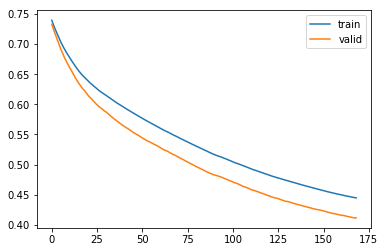

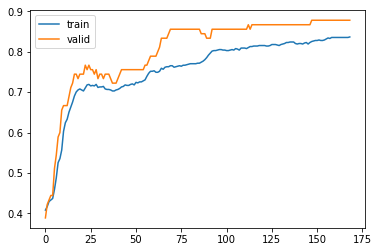

In [51]:
loss_plt, = plt.plot(history.history['loss'], label='train')
val_loss_plt, = plt.plot(history.history['val_loss'], label='valid')

plt.legend(handles=[loss_plt, val_loss_plt])
plt.show()

acc_plt, = plt.plot(history.history['acc'], label='train')
val_acc_plt, = plt.plot(history.history['val_acc'], label='valid')

plt.legend(handles=[loss_plt, val_loss_plt])
plt.show()

In [52]:
1-df_test['Survived'].sum()/len(df_test['Survived'].index)

0.66267942583732053

In [53]:
df_test[['PassengerId', 'Survived']].to_csv(path_or_buf='./out.csv', index=False)    